## Group member 1

### Subtask:
data loading and handling missing bmi data


**Reasoning**:
Import necessary libraries and load the dataset.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/StrokeData.csv")

ModuleNotFoundError: No module named 'pandas'

**Reasoning**:
Display the first 5 rows, column information, and summary statistics of the dataframe to understand its structure and content.



In [ ]:
display(df.head())
df.info()
display(df.describe())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Reasoning**:
Check for missing values and calculate the mean of the 'bmi' column.



In [ ]:
print("\nMissing values per column before imputation:")
print(df.isnull().sum())

bmi_mean = df['bmi'].mean()
print(f"\nMean of 'bmi' column: {bmi_mean}")


Missing values per column before imputation:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Mean of 'bmi' column: 28.893236911794666


**Reasoning**:
Visualize the distribution of the 'bmi' column before imputation and then fill the missing values with the calculated mean.



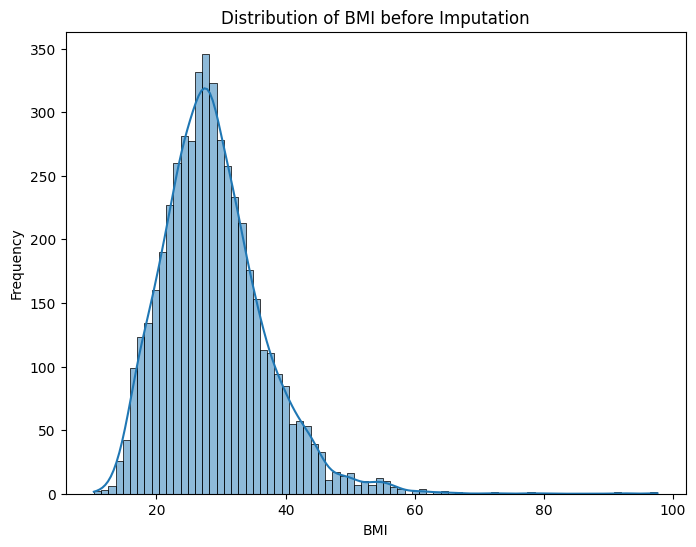

/tmp/ipython-input-1187792193.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(bmi_mean, inplace=True)


In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'].dropna(), kde=True)
plt.title('Distribution of BMI before Imputation')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

df['bmi'].fillna(bmi_mean, inplace=True)

**Reasoning**:
Verify that the missing 'bmi' values have been filled and visualize the distribution after imputation.




Missing values per column after imputation:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


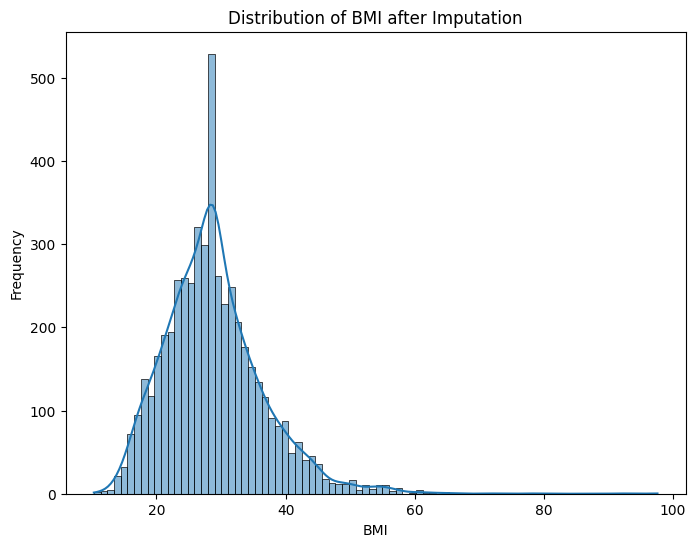

In [ ]:
print("\nMissing values per column after imputation:")
print(df.isnull().sum())

plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'], kde=True)
plt.title('Distribution of BMI after Imputation')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()